*Теоретический материал:* https://youtu.be/TGO-YPrfs1A

# Ведение в генетические алгоритмы


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [ ]:
import random as random # Импортируем библиотку генерации случайных значений
import numpy as np # Импортируем библиотеку numpy
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib
import matplotlib.colors as colors # Импортируем модуль colors библиотеки matplotlib

# Статический вывод графики (графики отображаются в той ячейке, в которой используется plt.show())
%matplotlib inline 

# Поиск минимума функции

*Разбор данного раздела:* https://youtu.be/dMySAaTqzSI?t=5

In [ ]:
'''
    Функция получения выжившей популяции
        Входные параметры:
        - popul - наша популяция
        - val - текущие значения
        - nsurv - количество выживших
        - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
'''
def getSurvPopul(
        popul,
        val,
        nsurv,
        reverse
        ):
    newpopul = [] # Двумерный массив для новой популяции
    sval = sorted(val, reverse=reverse) # Сортируем зачения в val в зависимости от параметра reverse    
    for i in range(nsurv): # Проходимся по циклу nsurv-раз (в итоге в newpopul запишется nsurv-лучших показателей)
        index = val.index(sval[i]) # Получаем индекс i-того элемента sval в исходном массиве val
        newpopul.append(popul[index]) # В новую папуляцию добавляем элемент из текущей популяции с найденным индексом
    return newpopul, sval # Возвращаем новую популяцию (из nsurv элементов) и сортированный список

'''
    Функция получения родителей
        Входные параметры:
        - curr_popul - текущая популяция
        - nsurv - количество выживших
'''
def getParents(
        curr_popul,
        nsurv
        ):   
    indexp1 = random.randint(0, nsurv - 1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    indexp2 = random.randint(0, nsurv - 1) # Случайный индекс второго родителя в диапазоне от 0 до nsurv - 1    
    botp1 = curr_popul[indexp1] # Получаем первого бота-родителя по indexp1
    botp2 = curr_popul[indexp2] # Получаем второго бота-родителя по indexp2    
    return botp1, botp2 # Возвращаем обоих полученных ботов

'''
    Функция смешивания (кроссинговера) двух родителей
        Входные параметры:
        - botp1 - первый бот-родитель
        - botp2 - второй бот-родитель
        - j - номер компонента бота
'''
def crossPointFrom2Parents(
        botp1,
        botp2, 
        j
        ):
    pindex = random.random() # Получаем случайное число в диапазоне от 0 до 1
    
    # Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
    if pindex < 0.5:
        x = botp1[j]
    else:
        x = botp2[j]
    return x # Возвращаем значние бота

In [ ]:
n = 100 # Размер популяции
nsurv = 20 # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n - nsurv # Количество новых (столько новых ботов создается)
l = 8 # Длина бота
epohs = 500 # Количество эпох

mut = 0.25 # Коэфициент мутаций

popul = [] # Двумерный массив популяции, размерностью [n, l]. 100 ботов по 8 компонентов каждый
val = [] # Одномерный массив значений этих ботов

for i in range(n): # Проходим по всей длине популяции
    popul.append([]) # Создаем пустого бота
    for j in range(l): # Проходим по всей длине бота
        popul[i].append(random.random()) # В каждый компонент бота записываем рандомное значение 

for it in range(epohs): # Пробегаемся по всем эпохам
    val = [] # Создаем пустой список для значений ботов

    for i in range(n): # Проходим по всей длине популяции
        bot = popul[i] # Берем очередного бота
    
        # в каждом боте должны быть закодированы парные значения x-y
        x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3] # первые 4 значения отводим для Х
        y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] # вторые 4 значения - для Y
        f = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y # для кодирования применяем эту функцию
        val.append(abs(f)) # добавляем модуль значения в список на эпоху
                           # в этой задаче будем искать 0 функции
    
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # Получаем новую популяцию и сортированный список значнией
    print(it, " ", [round(s,8) for s in sval[0:5]]) # Выводим 5 лучших ботов
 
    for i in range(nnew): # Проходимся в цикле nnew-раз 
        botp1, botp2 = getParents(newpopul, nsurv) # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = [] # Массив для нового бота
        # проходимся по длине бота и осуществляем смешивание/скрещивание от родителей
        for j in range(l): # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j) # Получаем значение для j-ого компонента бота
            x += mut*(2*random.random() - 1.0) #Добавялем к значению бота случайную величину, зависящую от коэфециента мутации        
            newbot.append(x) # Добавялем новое значение в бота      
        newpopul.append(newbot) # Добавляем бота в новую популяцию 
        #(таким образом к nsurv-лучших ботов предыдующей популяции добавится nnew-новых ботов)
    
    popul = newpopul # Записываем в popul посчитанную новую популяцию

0   [8.50931548, 10.16121721, 10.33756398, 11.35186324, 12.84403748]
1   [8.12919432, 8.28205176, 8.36467521, 8.50931548, 8.6248128]
2   [7.94609652, 8.09653874, 8.10012206, 8.11638841, 8.12919432]
3   [4.15834395, 7.94609652, 8.02585625, 8.06206229, 8.09653874]
4   [4.15834395, 7.92750135, 7.94609652, 7.97758036, 8.02118155]
5   [4.15834395, 7.92750135, 7.94609652, 7.95950596, 7.97758036]
6   [2.59325216, 4.15834395, 7.86663439, 7.90971968, 7.92750135]
7   [0.49368923, 2.59325216, 4.15834395, 5.5326026, 7.86663439]
8   [0.49368923, 0.50541923, 1.24619017, 1.74691166, 2.59325216]
9   [0.34768358, 0.40516756, 0.49368923, 0.50541923, 0.89671238]
10   [0.13944759, 0.34768358, 0.40516756, 0.42055648, 0.49368923]
11   [0.13944759, 0.1926739, 0.20482384, 0.34768358, 0.40516756]
12   [0.08273521, 0.13944759, 0.1926739, 0.20482384, 0.22641422]
13   [0.08273521, 0.11948589, 0.13944759, 0.1926739, 0.20482384]
14   [0.08273521, 0.11948589, 0.13944759, 0.1926739, 0.20482384]
15   [0.08273521, 0.11

In [ ]:
bot = popul[0] # Берем первого (лучшего) бота в финальной популяции
x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3] # Считаем x
y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] # Считаем y
f = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y # Считаем значение функции
print(bot) # Выводим бота (8 компонент)
print("x =",x, "y =", y) # Выводим значения x и y
print("f =",f) # Выводим значение функции (которое должно быть максимально близко к 0 по условию задачи)

[-0.20886489315703644, -0.3563679483984373, -0.8962578757645141, 0.1565141064024863, 1.5407697532820839, 0.3826456461876778, 1.0252842146061876, 0.10555338623547139]
x = -7.040430732732205 y = 16.345674786169134
f = 0.00040734265315234275


In [ ]:
# Выведем значения 20 лучших ботов
for i in range(20):
    bot = popul[i] # Берем очередного бота
    x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3] # Считаем x
    y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] # Считаем y
    f = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y # Считаем значение функции
    print("x =",x, "y =", y, "f =", f) # Выводим посчитанные значения

x = -7.040430732732205 y = 16.345674786169134 f = 0.00040734265315234275
x = -6.925747418245749 y = 16.412775112936238 f = 0.0006374035732807926
x = -6.800908011622148 y = 16.472085628564162 f = 0.0017715841107759367
x = -7.796267539344242 y = 15.640030783065601 f = -0.0018958460351397033
x = -8.010697715507062 y = 15.364899580606338 f = -0.002710952509878739
x = -10.053491353742924 y = 11.893566707703018 f = -0.0034080147947899153
x = -4.95073058208769 y = 15.765378114549994 f = -0.0036963027261907033
x = -5.0069392356589475 y = 15.830596384301806 f = -0.0038452967265782956
x = -6.126417640070665 y = 16.559171647780293 f = 0.004379607161179688
x = -3.897159393440541 y = 14.08507485288018 f = 0.005324994242095871
x = -2.130335034475908 y = 9.661684635223644 f = 0.005716415733565405
x = -8.977555431274542 y = 13.832036236013256 f = -0.0057503945301573545
x = -6.726204575537727 y = 16.509841873552563 f = -0.005848122967815339
x = -4.566053222956054 y = 15.254124956894673 f = -0.006002493

# Распределение грузов по поездам

*Разбор данного раздела:* https://youtu.be/dMySAaTqzSI?t=1431


In [ ]:
train = np.array([11, 18, 6, 15, 9, 3, 2, 21]) # Вместимость каждого поезда
# Количество каждого груза (сумма грузов должна быть равна вместимости всех поездов (85=85))

size = np.array([5, 6, 9, 5, 4, 3, 3, 5, 8, 2, 6, 3, 2, 1, 2, 20, 1]) 


print(train.sum())
print(size.sum())

print(train.shape)
print(size.shape)

85
85
(8,)
(17,)


In [ ]:
size

array([ 5,  6,  9,  5,  4,  3,  3,  5,  8,  2,  6,  3,  2,  1,  2, 20,  1])

0   72.48   [30, 34, 34, 38, 42, 44, 44, 44, 50, 50, 52, 52, 54, 54, 56, 56, 58, 60, 60, 60]
1   58.98   [24, 30, 32, 32, 34, 34, 36, 38, 38, 38, 38, 40, 42, 42, 44, 44, 44, 46, 46, 46]
2   53.14   [24, 30, 30, 30, 30, 32, 32, 32, 34, 34, 34, 34, 36, 36, 38, 38, 38, 38, 38, 38]
3   50.5   [24, 30, 30, 30, 30, 30, 32, 32, 32, 34, 34, 34, 34, 34, 36, 36, 36, 36, 36, 36]
4   49.82   [22, 24, 24, 30, 30, 30, 30, 30, 30, 32, 32, 32, 32, 32, 34, 34, 34, 34, 34, 34]
5   48.42   [22, 24, 24, 24, 24, 26, 26, 30, 30, 30, 30, 30, 30, 30, 32, 32, 32, 32, 32, 32]
6   46.54   [20, 22, 22, 24, 24, 24, 24, 26, 26, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 32]
7   47.32   [12, 20, 22, 22, 22, 22, 24, 24, 24, 24, 26, 26, 30, 30, 30, 30, 30, 30, 30, 30]
8   45.34   [12, 18, 20, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24, 26, 26, 26, 28, 30, 30, 30]
9   44.98   [12, 18, 20, 20, 22, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24, 24, 26, 26, 26, 28]
10   45.54   [12, 18, 20, 20, 20, 22, 22, 22, 22, 22, 22, 22, 24, 24, 2

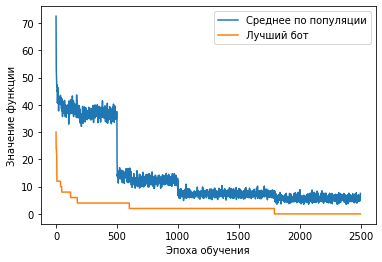

In [ ]:
n = 100 # Общее число ботов
nsurv = 20 # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv # Количество новых (столько новых ботов создается)
epohs = 2500 # количество эпох
mut = 0.4 # коэфициент мутаций

# Длина бота(количество единиц груза) (Каждый компонент указывает индекс поезда, в котором этот груз будет размещен)
l = size.shape[0] 
trains = train.shape[0] # Количество поездов

popul = [] # Двумерный массив популяции, размерностью [n, l].
val = [] # Одномерный массив значений этих ботов

plotmeanval = [] # сюда будут заносится значения для графика по среднему значению
plotminval = [] # сюда будут заносится значения для графика по минимальному значению
 
for i in range(n): # Проходим по всей длине популяции
    popul.append([]) # Создаем пустого бота
    for j in range(l): # Проходим по всей длине бота
        
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs): # Проходим по всем эпохам

    if (it == 500): # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.1   
    if (it == 1000): # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.05  

    val = [] # Создаем пустой список для значений ботов
    for i in range(n): # Проходим по всей популяции
        bot = popul[i] # Берем очередного бота
        trainfill = np.array([0, 0, 0, 0, 0, 0, 0, 0]) # Массив, хранящий заполняемость каждого поезда
        for j in range(l): # Проходим по всей длине бота
            trainfill[bot[j]] += size[j] # Увеличиваем заполненность bot[j]-го поезда на size[j]          
        
        f = 0 # Обнуляем ошибку i-го бота 
        for t in range(trains): # Проходим по всем поездам
            # Увеличиваем ошибку i-го бота на модуль разницы между реальной вместимостью поезда 
            # и вместимостью, который посчитал бот
            f += abs(train[t] - trainfill[t]) 
        val.append(f) # Добавляем в val значение ошибки для i-го бота    
    
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # Получаем новую популяцию и сортированный список значнией
    print(it, " ", sum(val) / len(val), " ", sval[0:20])  # Выводим среднее значение и 20 лучших ботов  
    plotmeanval.append(sum(val) / len(val)) # Добавляем среднее значение в список
    plotminval.append(sval[0]) # Добавляем минимальное значение в список
    
    for i in range(nnew): # Проходимся в цикле nnew-раз
        botp1, botp2 = getParents(newpopul, nsurv) # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = [] # Массив для нового бота
    
        for j in range(l): # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j) # Получаем значение для j-ого компонента бота
        
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x) # Добавляем новое значение в бота      
        newpopul.append(newbot) # Добавляем бота в новую популяцию    
    popul = newpopul # Записываем в popul новую посчитанную популяцию

# построение графиков 
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [ ]:
# Выводим 20 лучших ботов
for i in range(20):
    print(popul[i])

[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
[1, 0, 4, 1,

In [ ]:
bot = popul[0] # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot) # Выводим значения бота (каждый параметр хранит номер поезда, в который следует разместить груз)

trainfill = np.zeros(trains, dtype = 'int32') # Массив заполненности поездов
for j in range(l): # Проходим по всей длине бота
    trainfill[bot[j]] += size[j] # Увеличиваем заполненность bot[j]-ого поезда на size[j]

print ('Вместимость поездов по боту:', trainfill) # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train) # Выводим реальную вместимость поездов

Значения лучшего бота: [1, 0, 4, 1, 2, 3, 5, 3, 1, 6, 3, 0, 2, 7, 0, 7, 3]
Вместимость поездов по боту: [11 18  6 15  9  3  2 21]
Реальная вместимость поездов: [11 18  6 15  9  3  2 21]
